# Spectal Clustering

This implementaion of spectral clustering is baes on paper "On Spectral Clustering: Analysis and an algorithm"

In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
%matplotlib inline
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [3]:
import numpy as np
from sklearn.cluster import KMeans

def spectral_cluster(X, n_clusters=3, sigma=1): 
    '''
    n_cluster : cluster into n_cluster subset
    sigma: a parameter of the affinity matrix
    
    '''
    def affinity_matrix(X, sigma=1):
        N = len(X)
        A = np.zeros((N, N))
        for i in range(N):
            for j in range(i+1, N):
                A[i][j] = np.exp(-np.linalg.norm(X[i] - X[j]) ** 2 / (2 * sigma ** 2))
                A[j][i] = A[i][j]
        return A
    
    A = affinity_matrix(X, sigma)
    
    def laplacianMatrix(A):
        dm = np.sum(A, axis=1)
        D = np.diag(dm)
        sqrtD = np.diag(1.0 / (dm ** 0.5))
        return np.dot(np.dot(sqrtD, A), sqrtD)
    
    L = laplacianMatrix(A)
    
    def smallNeigen(L, n_clusters):
        eigval, eigvec = np.linalg.eig(L)
        index = np.argsort(eigval)[-n_clusters:]
        return eigvec[:, index]
        
    newX = smallNeigen(L, n_clusters)
    
    def renormalization(newX):
        Y = newX.copy()
        for i in range(len(newX)):
            norm = 0
            for j in newX[i]:
                norm += (newX[i] ** 2)
            norm = norm ** 0.5
            Y[i] /= norm
        return Y
    
    Y = renormalization(newX)
    
    kmeans = KMeans(n_clusters=n_clusters).fit(Y)
    return kmeans.labels_

In [4]:
y_label = spectral_cluster(iris.data, n_clusters=3)

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

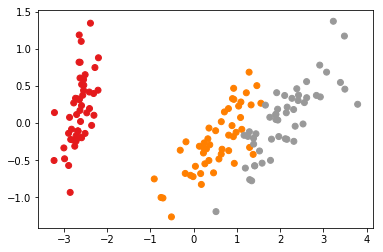

In [6]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=2).fit_transform(iris.data)

y = iris.target
import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1)

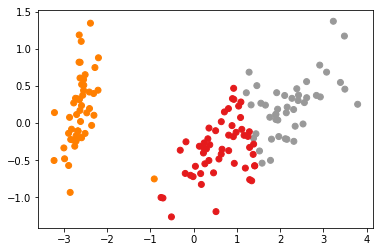

In [7]:
y = spectral_cluster(iris.data, n_clusters=3, sigma=1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1)

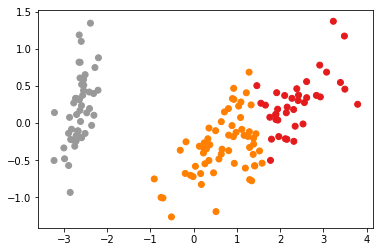

In [8]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=3,
        assign_labels="kmeans",
        random_state=0).fit(X_reduced)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clustering.labels_, cmap=plt.cm.Set1)

In [9]:
def evaluate(y, t):
    a, b, c, d = [0 for i in range(4)]
    for i in range(len(y)):
        for j in range(i+1, len(y)):
            if y[i] == y[j] and t[i] == t[j]:
                a += 1
            elif y[i] == y[j] and t[i] != t[j]:
                b += 1
            elif y[i] != y[j] and t[i] == t[j]:
                c += 1
            elif y[i] != y[j] and t[i] != t[j]:
                d += 1
    return a, b, c, d

def external_index(a, b, c, d, m):
    JC = a / (a + b + c)
    FMI = np.sqrt(a**2 / ((a + b) * (a + c)))
    RI = 2 * ( a + d ) / ( m * (m + 1) )
    return JC, FMI, RI

def evaluate_it(y, t):
    a, b, c, d = evaluate(y, t)
    return external_index(a, b, c, d, len(y))

In [10]:
evaluate_it(iris.target, y)

(0.688659793814433, 0.8156321258039801, 0.8667549668874173)